Do Rihanna's Lyrics Follow Zipf's Law? A Statistical Exploration?

1. Subhan Kumar Rai [subhan.rai@adypu.edu.in]: I was responsible for preparing and cleaning the lyrics data, extracting words from the text, and calculating word frequencies. This laid the groundwork for analyzing the linguistic distribution in Rihanna’s lyrics as required by Zipf’s Law.

2. Soham Jayesh Saranga [soham.saranga@adypu.edu.in]: I handled the visualization of word frequency data by generating a log-log plot to demonstrate the relationship between word rank and frequency. This helped us verify the presence of Zipf’s Law in Rihanna’s lyrics.

3. Shorya Taneja [shorya.taneja@adypu.edu.in]: I focused on explaining the core concept of Zipf’s Law in a way that is easy to understand, using real-world examples and visual metaphors. I also created the introductory slides and theory section to set the foundation for how Zipf’s Law connects to song lyrics.

4. Siddharth Pareek [siddharth.pareek@adypu.edu.in]: I worked on designing the visual output slides, including the log-log graph, its interpretation, and insights. I helped translate the results into meaningful takeaways about Rihanna’s lyric patterns, emphasizing how Zipf’s Law appears in real music data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fileLoc = "drive/MyDrive/MATHS.csv"

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
import numpy as np

df = pd.read_csv(fileLoc)

In [5]:
lyrics_text = " ".join(df['Lyric'].dropna().astype(str)).lower()
words = re.findall(r'\b\w+\b', lyrics_text)
word_freq = Counter(words)

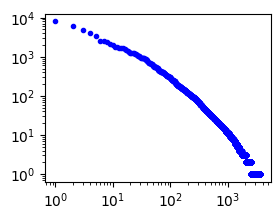

In [10]:
plt.subplot(2, 2, 4)
plt.loglog(ranks, frequencies, marker='.', linestyle='none', label="Actual", color='blue')

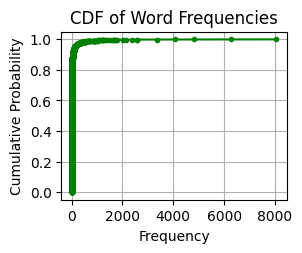

In [9]:
plt.subplot(2, 2, 3)
sorted_freq = np.array(sorted(frequencies))
cdf = np.arange(1, len(sorted_freq) + 1) / len(sorted_freq)
plt.plot(sorted_freq, cdf, marker='.', linestyle='-', color='green')
plt.title("CDF of Word Frequencies")
plt.xlabel("Frequency")
plt.ylabel("Cumulative Probability")
plt.grid(True)

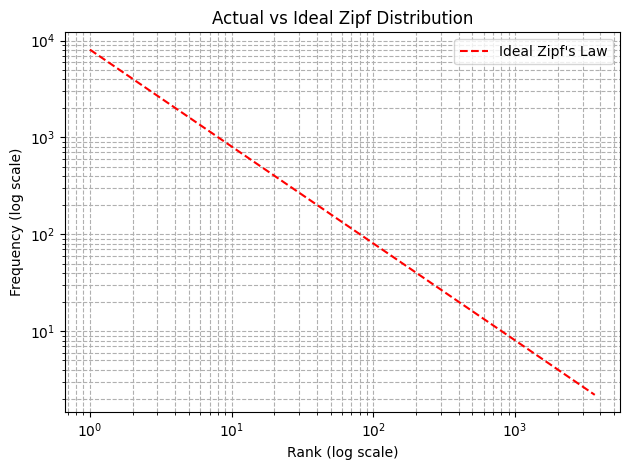

In [11]:
# Plot y = C / rank
C = frequencies[0]
zipf_line = [C / r for r in ranks]
plt.loglog(ranks, zipf_line, linestyle='--', color='red', label="Ideal Zipf's Law")
plt.title("Actual vs Ideal Zipf Distribution")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

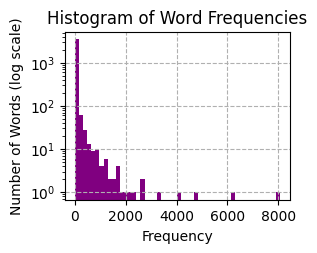

In [8]:
plt.subplot(2, 2, 2)
plt.hist(frequencies, bins=50, log=True, color='purple')
plt.title("Histogram of Word Frequencies")
plt.xlabel("Frequency")
plt.ylabel("Number of Words (log scale)")
plt.grid(True, ls="--")


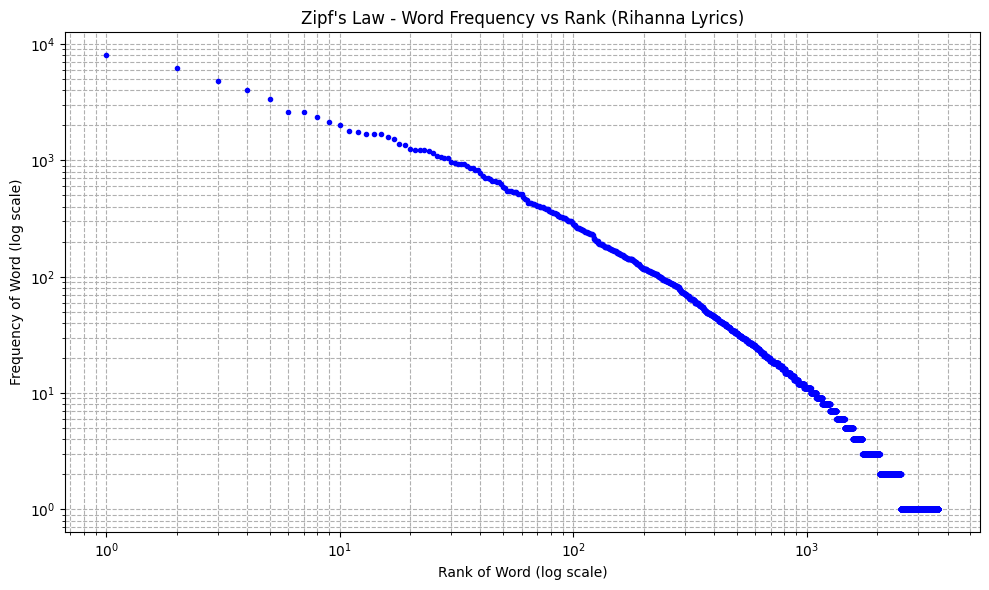

In [6]:
lyrics_text = " ".join(df['Lyric'].dropna().astype(str)).lower()

words = re.findall(r'\b\w+\b', lyrics_text)

word_freq = Counter(words)
frequencies = sorted(word_freq.values(), reverse=True)

ranks = range(1, len(frequencies) + 1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.', linestyle='none', color='blue')
plt.title("Zipf's Law - Word Frequency vs Rank (Rihanna Lyrics)")
plt.xlabel("Rank of Word (log scale)")
plt.ylabel("Frequency of Word (log scale)")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()